<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

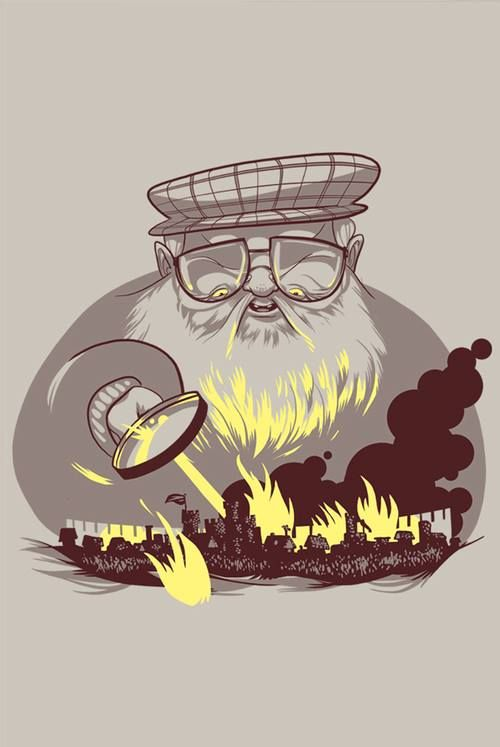

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [89]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 66.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 96.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [91]:
data = pd.read_csv("game_of_thrones_train.csv", index_col="S.No") # тестовая и тренировочная выборки совмещены для корректной работы разметки по упрощенным культурам

In [92]:
data[:1557] #тренировочная часть

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

<Axes: xlabel='S.No'>

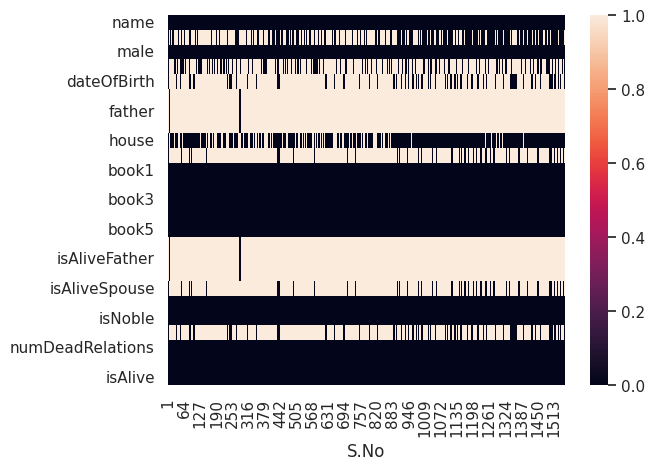

In [94]:
sns.heatmap(data.isna().transpose())

In [95]:
print(round((data['title'].isna().sum() / len(data['title'])) * 100, 3))
print(round((data['age'].isna().sum() / len(data['age'])) * 100, 3))
print(round((data['culture'].isna().sum() / len(data['culture'])) * 100, 3))
print(round((data['dateOfBirth'].isna().sum() / len(data['dateOfBirth'])) * 100, 3))

53.95
82.081
68.658
82.081


In [96]:
# Удаляем часть столбцов (наименее информативные)
# age и dateOfBirth - одно и то же
data.drop(columns=['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'spouse', 'dateOfBirth', 'house', 'title'], inplace=True)

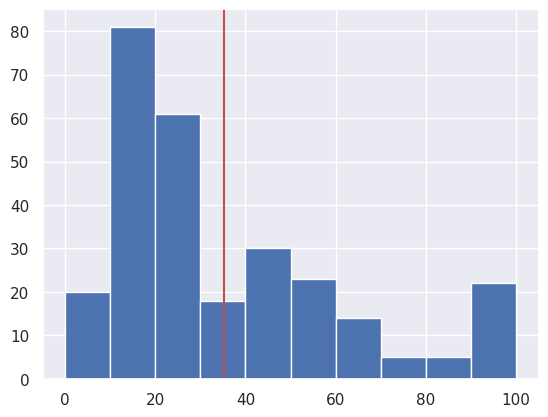

In [97]:
# по возрасту нашелся выброс, он даже среднее сильно меняет, среднее нужно для заполнения пропусков
mean_Age = np.mean(data[data['age']>-50000]['age'].dropna().values)
plt.hist(data[data['age']>-50000]['age'])
plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')

In [98]:
# выбросов оказалось много, убираем (только при обучении)
data = data.drop(data.index[data['age']<-50000])

In [99]:
# заполнение пропусков
fill_na_values = {'age':mean_Age}
data = data.fillna(value=fill_na_values)
data = data.fillna('none')

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [100]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: True if x > 0 else False)

In [101]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [102]:
def simplify_culture(culture_value):
    for main_culture, variants in cult.items():
        if culture_value.lower() in variants:
            return main_culture
    return culture_value

data['simplified_culture'] = data['culture'].apply(simplify_culture)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [103]:
# остальное уже удалено
data.drop(columns=['culture'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

<Axes: >

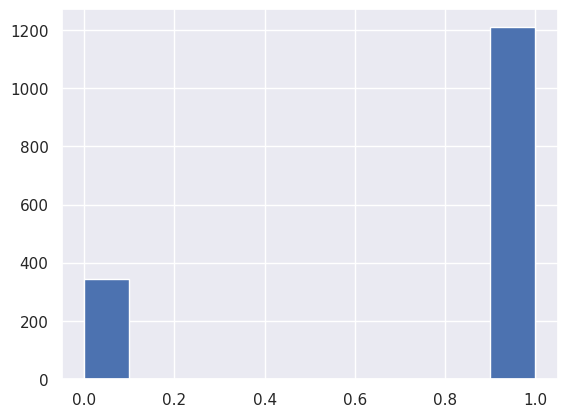

In [104]:
# пункты с анализом делались только для выборки без тренировочной части, она была присоединена позднее !!!

data['isAlive'].hist() # живых в 3 раза больше

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [105]:
categorical_columns = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations', 'simplified_culture']
categorical_features = data[categorical_columns]
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

In [106]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

,name,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,simplified_culture_Summer Islands,simplified_culture_Tyroshi,simplified_culture_Vale,simplified_culture_Vale mountain clans,simplified_culture_Valemen,simplified_culture_Valyrian,simplified_culture_Westermen,simplified_culture_Westerosi,simplified_culture_ironborn,simplified_culture_none
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,0,0,0,0,0,0,0,35.290323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Walder Frey,1,1,1,1,1,1,1,1,97.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Addison Hill,1,0,0,0,1,0,0,1,35.290323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Aemma Arryn,0,0,0,0,0,0,1,1,23.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Sylva Santagar,0,0,0,0,1,0,1,1,29.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,1,1,0,1,1,0,0,1,35.290323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1554,Masha Heddle,0,1,1,0,0,0,0,0,35.290323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,Matthos Seaworth,1,0,1,1,1,1,0,0,35.290323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
data.head()

,name,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,simplified_culture
S.No,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,True,none
2,Walder Frey,1,1,1,1,1,1,1,1,97.000000,1,0.896321,1,1,True,Rivermen
3,Addison Hill,1,0,0,0,1,0,0,1,35.290323,0,0.267559,1,0,False,none
4,Aemma Arryn,0,0,0,0,0,0,1,1,23.000000,0,0.183946,0,0,False,none
5,Sylva Santagar,0,0,0,0,1,0,1,1,29.000000,0,0.043478,1,0,False,Dornish


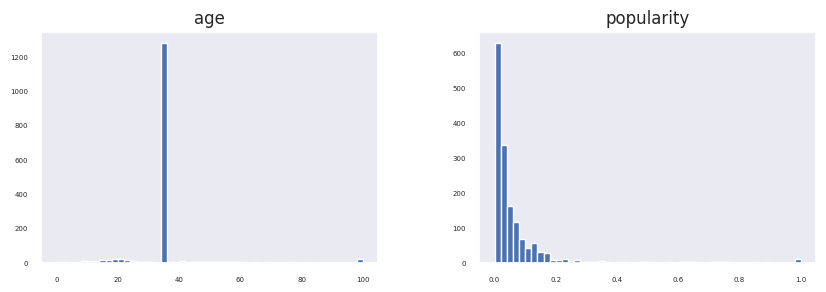

In [108]:
numerical_columns = ['age', 'popularity']
num_features = data[numerical_columns]
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False);

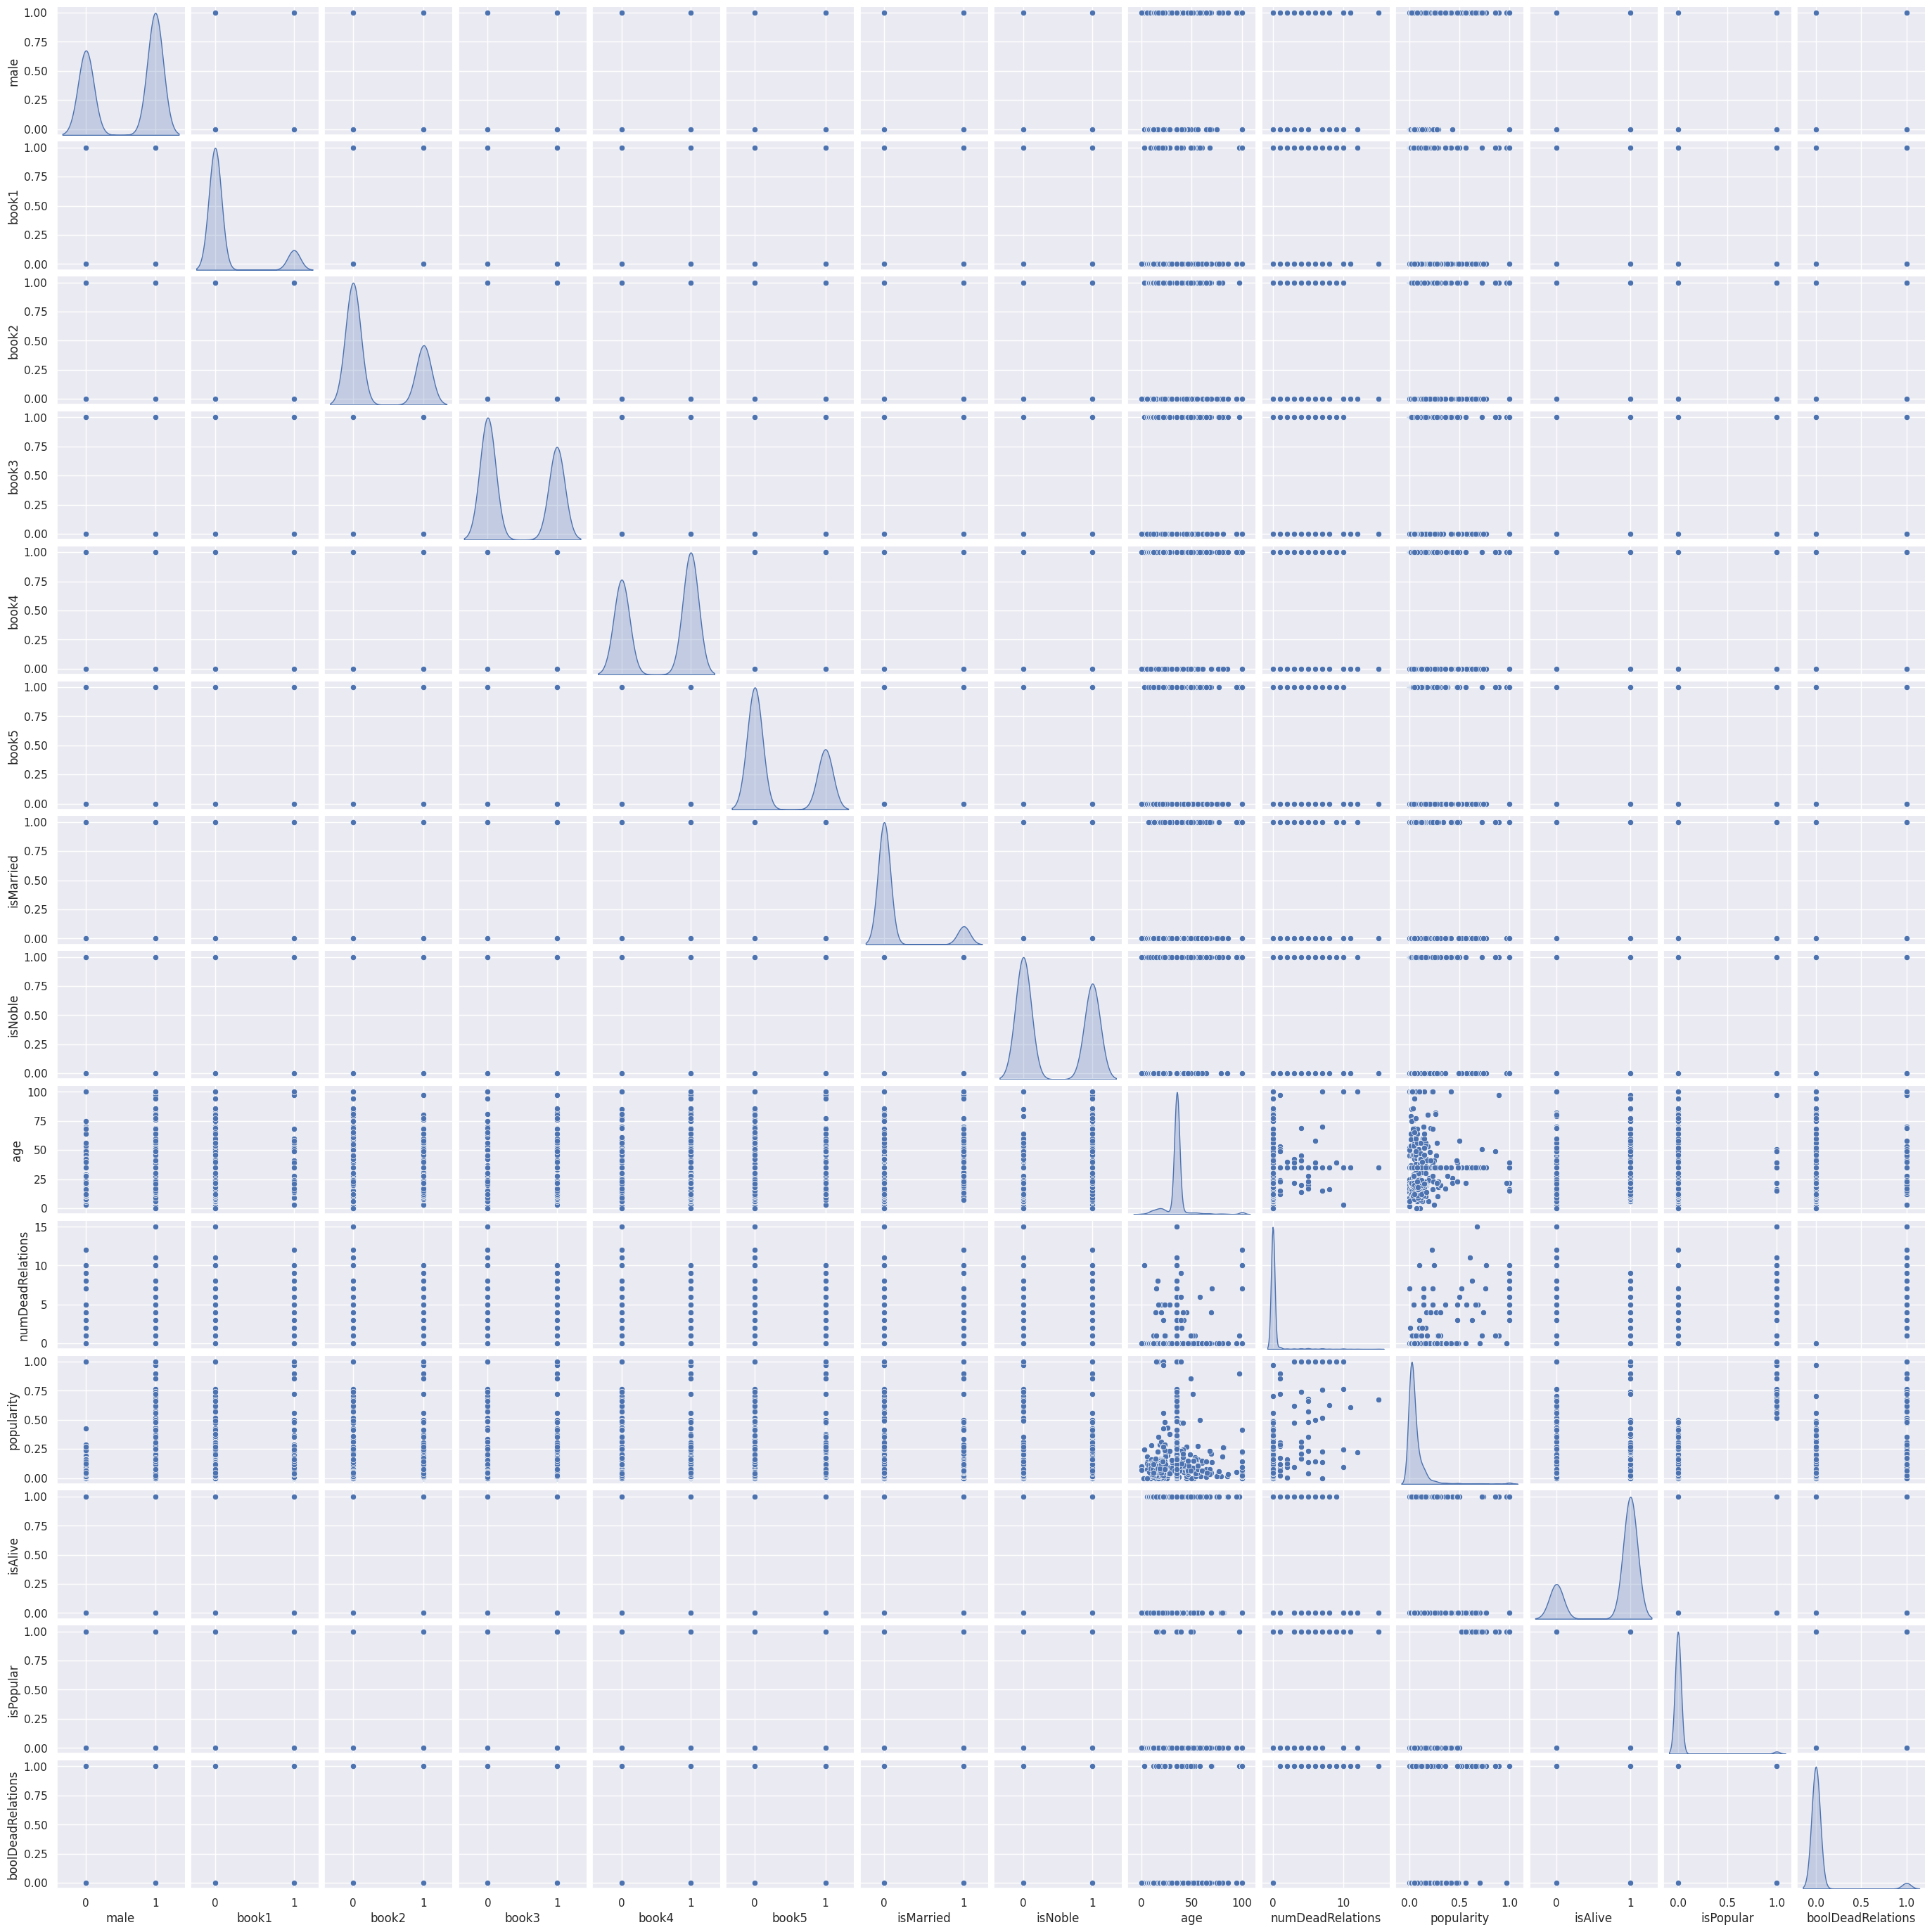

In [109]:
sns.set()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

In [110]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

ValueError: could not convert string to float: 'Viserys II Targaryen'

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

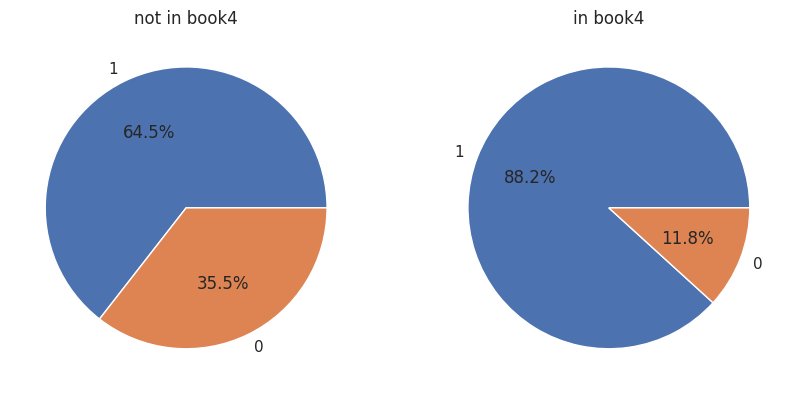

In [112]:
# Готовим данные для графика
data1 = data[data['book4'] == 0]['isAlive'].value_counts()
data2 = data[data['book4'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("not in book4")
ax2.set_title("in book4")

plt.show()

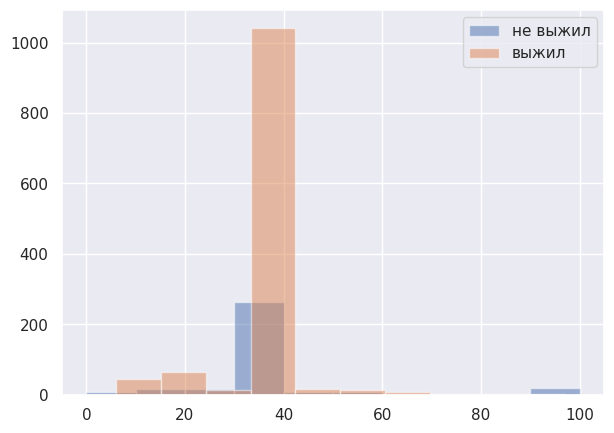

In [113]:
# челы из 4 книги умирают реже

plt.figure(figsize=(7, 5))

plt.hist(data['age'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['age'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

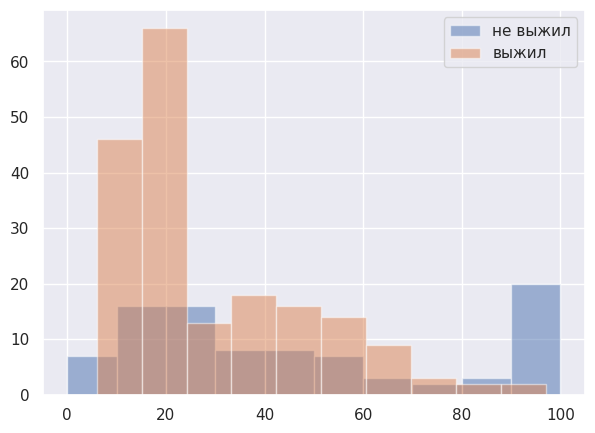

In [114]:
data__ = data[data['age'] != data['age'].mean()]

plt.figure(figsize=(7, 5))

plt.hist(data__['age'][data__['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data__['age'][data__['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

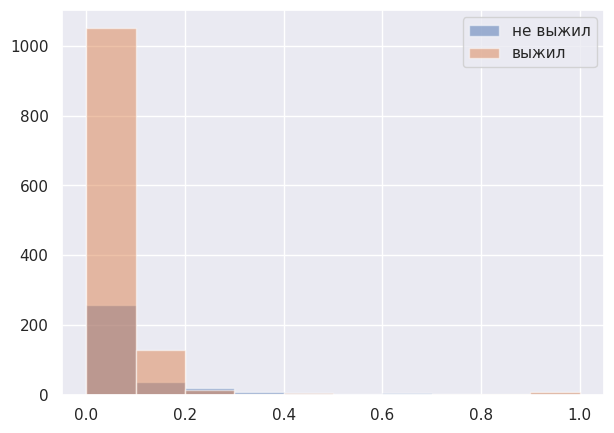

In [115]:
# молодые неплохо выживают

plt.figure(figsize=(7, 5))

plt.hist(data['popularity'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['popularity'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

In [116]:
# непопулярные неплохо выживают

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [117]:
data_for_train = df_encoded[:1557]
data_for_test = df_encoded[1557:]

In [118]:
y = data_for_train['isAlive'].values
X = data_for_train.drop(columns=['name', 'isAlive']).values

In [119]:
X_test = data_for_test.drop(columns=['name', 'isAlive']).values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [122]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [123]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [124]:
# !!! Необходимо запустить ячейку с обучением, а потом ячейку с проверкой точности для соответствующей модели. Подряд нельзя!!


# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1.5, max_iter=1000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [127]:
# Шаг 1. создание модели
RandomForestClassifier_ = RandomForestClassifier()

# Шаг 2. обучение модели

RandomForestClassifier_.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных

y_pred = RandomForestClassifier_.predict(X_test)

In [129]:
GaussianProcessClassifier_ = GaussianProcessClassifier()
GaussianProcessClassifier_.fit(X_train, y_train)
y_pred = GaussianProcessClassifier_.predict(X_test)

In [131]:
GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
y_pred = GaussianNB_.predict(X_test)

In [133]:
KNeighborsClassifier_ = KNeighborsClassifier()
KNeighborsClassifier_.fit(X_train, y_train)
y_pred = KNeighborsClassifier_.predict(X_test)

In [135]:
SVC_ = SVC()
SVC_.fit(X_train, y_train)
y_pred = SVC_.predict(X_test)

In [137]:
DecisionTreeClassifier_ = DecisionTreeClassifier()
DecisionTreeClassifier_.fit(X_train, y_train)
y_pred = DecisionTreeClassifier_.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [126]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [125]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6875


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [128]:
# Шаг 3. Предсказание на тестовых данных

y_pred = RandomForestClassifier_.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7500


In [130]:
y_pred = GaussianProcessClassifier_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7812


In [132]:
y_pred = GaussianNB_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.5000


In [134]:
y_pred = KNeighborsClassifier_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7500


In [136]:
y_pred = SVC_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6875


In [138]:
y_pred = DecisionTreeClassifier_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7188


In [139]:
print("Размер X_test:", X_test.shape)
print("Размер y_pred:", y_pred.shape)

Размер X_test: (32, 48)
Размер y_pred: (32,)


In [140]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [142]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.31MB/s]


Размер X_test: (32, 48)
Размер submission: (389, 1)
Размеры не совпадают. Используем все данные для предсказания.


ValueError: at least one array or dtype is required

In [143]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [144]:
y_pred = RandomForestClassifier_.predict(X_test)

In [145]:
submission['isAlive'] = y_pred

ValueError: Length of values (32) does not match length of index (389)

In [ ]:
print(y_pred)

In [ ]:
submission = submission.drop(columns=['isAlive_'])

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("new_submission.csv")

In [ ]:
# Загружаем файл submission.csv
submission = pd.read_csv("submission.csv", index_col='S.No')

# Проверяем размеры данных
print("Размер X_test:", X_test.shape)
print("Размер submission:", submission.shape)

# Если размеры не совпадают, используем все данные для предсказания
if X_test.shape[0] != submission.shape[0]:
    print("Размеры не совпадают. Используем все данные для предсказания.")
    X_submission = submission.drop(columns=['isAlive'])  # Убираем целевой столбец
    y_pred = RandomForestClassifier_.predict(X_submission)
else:
    y_pred = RandomForestClassifier_.predict(X_test)

# Присваиваем предсказания в submission
submission['isAlive'] = y_pred

# Сохраняем результат
submission.to_csv("submission_with_predictions.csv") #######################